Chapter 14

# 协方差矩阵
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码使用鸢尾花数据集，对数据的协方差矩阵和相关矩阵进行计算和可视化分析，探索数据特征的分布、主成分方向、矩阵分解等。

### 1. 协方差和逆协方差矩阵的热力图
代码首先计算并可视化鸢尾花数据集特征的协方差矩阵 $\Sigma$，描述特征间的共变关系。协方差矩阵的逆 $\Sigma^{-1}$ 代表了马氏距离的测量方式，用于判断点到均值的多维距离。

### 2. 按类标签的协方差和相关矩阵
代码计算并展示了数据集按标签（不同类别的鸢尾花）分割后的协方差和相关矩阵。对于每个类别 $Y=0$（Setosa）、$Y=1$（Versicolor）、$Y=2$（Virginica），可以查看不同特征之间的依赖性强度。

### 3. 协方差矩阵的分解
协方差矩阵 $\Sigma$ 可分解为 $D \cdot P \cdot D$ 形式，其中 $D$ 是对角矩阵，包含特征的标准差，$P$ 为相关矩阵。代码将协方差矩阵和相关矩阵展示成热力图，揭示了特征的方差与共变关系。

### 4. 协方差矩阵的特征值分解
通过特征值分解，$\Sigma$ 分解为 $V \cdot \Lambda \cdot V^T$，其中 $V$ 是特征向量矩阵，$\Lambda$ 是特征值矩阵，表示了数据在主成分方向上的方差。特征值分解用于探索数据在不同方向的方差分布。

### 5. 协方差矩阵的分层分解
利用张量积 $\lambda_j \cdot v_j \cdot v_j^T$ 对 $\Sigma$ 进行逐层分解，每一层由特征值 $\lambda_j$ 和特征向量 $v_j$ 的张量积组成。这展示了数据在不同方向上的贡献。

### 6. 奇异值分解 (SVD)
代码对数据的中心化矩阵 $X_c$ 进行了 SVD 分解，即 $X_c = U \cdot S \cdot V^T$，其中 $U$ 和 $V$ 分别表示数据和特征的方向矩阵，$S$ 为奇异值矩阵，描述了特征方向上的重要性。

### 7. 投影与主成分方向
通过投影 $Y_c = X_c \cdot V$，代码将数据从原始坐标系投影到主成分方向上，显示了数据在主成分空间的分布。

### 8. 协方差矩阵的Cholesky分解
代码对 $\Sigma$ 进行Cholesky分解，得到下三角矩阵 $L$ 和上三角矩阵 $R$，使得 $\Sigma = L \cdot L^T$。这种分解方式用于稳定计算和生成多元正态分布数据。



In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
import pandas as pd  # 导入数据处理库pandas
import seaborn as sns  # 导入绘图库seaborn
import scipy.linalg
from sklearn.datasets import load_iris  # 导入鸢尾花数据集

## 加载鸢尾花数据集

In [2]:
iris_sns = sns.load_dataset("iris")  # 加载seaborn自带的鸢尾花数据集
iris = load_iris()  # 加载sklearn自带的鸢尾花数据集

In [3]:
X = iris.data  # 提取特征数据
y = iris.target  # 提取目标标签

In [4]:
feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$', 
                 'Petal length, $X_3$', 'Petal width, $X_4$']  # 定义特征名称

In [5]:
X_df = pd.DataFrame(X, columns=feature_names)  # 将特征数据转换为数据框

## 协方差矩阵的热力图

In [6]:
SIGMA = X_df.cov()  # 计算协方差矩阵

Text(0.5, 1.0, 'Covariance matrix')

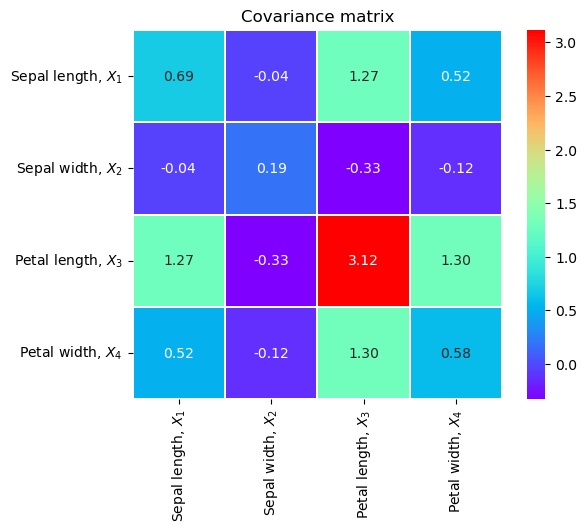

In [7]:
fig, axs = plt.subplots()  # 创建绘图窗口

h = sns.heatmap(SIGMA, cmap='rainbow', linewidths=.05, annot=True, fmt='.2f')  # 绘制协方差矩阵热力图
h.set_aspect("equal")  # 设置热力图比例
h.set_title('Covariance matrix')  # 设置标题

In [8]:
SIGMA_inv = np.linalg.inv(SIGMA)  # 计算协方差矩阵的逆矩阵

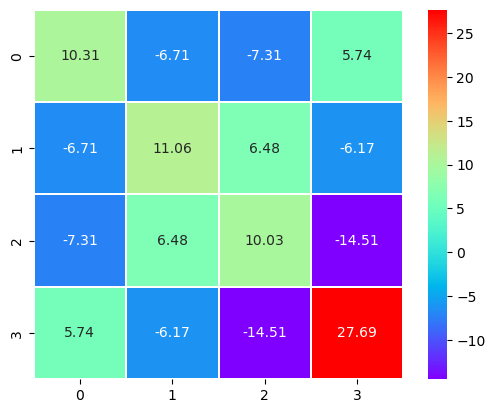

In [9]:
fig, axs = plt.subplots()  # 创建绘图窗口

h = sns.heatmap(SIGMA_inv, cmap='rainbow', linewidths=.05, annot=True, fmt='.2f')  # 绘制逆矩阵热力图
h.set_aspect("equal")  # 设置热力图比例

## 不同类别的协方差矩阵比较

Text(0.5, 1.0, 'Y = 2, virginica')

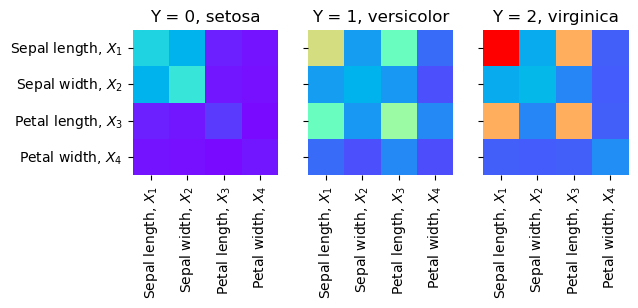

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)  # 创建子图

g1 = sns.heatmap(X_df[y == 0].cov(), cmap="rainbow", annot=None, cbar=False, ax=ax1, square=True, vmax=0.4, vmin=0)  # 绘制类别0的协方差矩阵
ax1.set_title('Y = 0, setosa')  # 设置标题

g2 = sns.heatmap(X_df[y == 1].cov(), cmap="rainbow", annot=None, cbar=False, ax=ax2, square=True, vmax=0.4, vmin=0)  # 绘制类别1的协方差矩阵
ax2.set_title('Y = 1, versicolor')  # 设置标题

g3 = sns.heatmap(X_df[y == 2].cov(), cmap="rainbow", annot=None, cbar=False, ax=ax3, square=True, vmax=0.4, vmin=0)  # 绘制类别2的协方差矩阵
ax3.set_title('Y = 2, virginica')  # 设置标题

## 线性相关系数矩阵

In [11]:
RHO = X_df.corr()  # 计算相关矩阵

Text(0.5, 1.0, 'Correlation matrix')

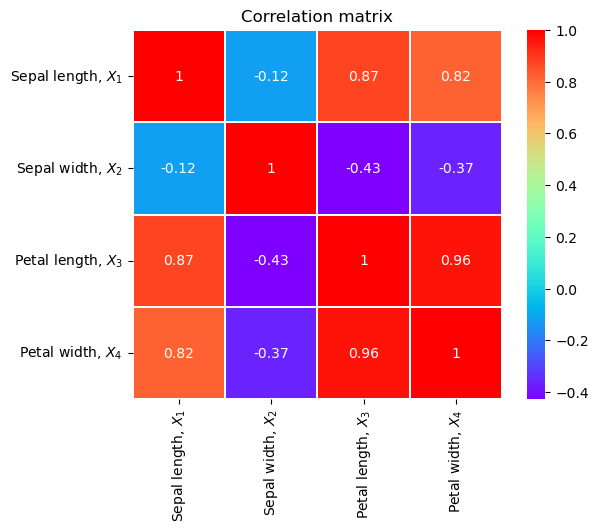

In [12]:
fig, axs = plt.subplots()  # 创建绘图窗口

h = sns.heatmap(RHO, cmap='rainbow', linewidths=.05, annot=True)  # 绘制相关矩阵热力图
h.set_aspect("equal")  # 设置热力图比例
h.set_title('Correlation matrix')  # 设置标题

## 不同类别的相关矩阵比较

Text(0.5, 1.0, 'Y = 2, virginica')

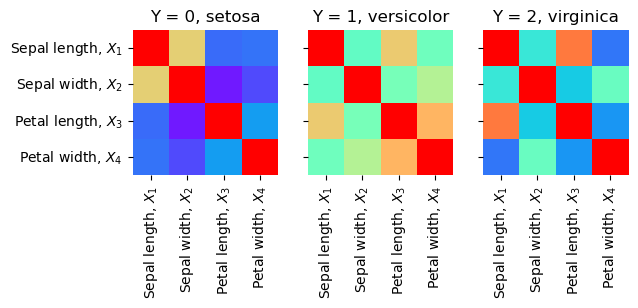

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)  # 创建子图

g1 = sns.heatmap(X_df[y == 0].corr(), cmap="rainbow", annot=False, cbar=False, ax=ax1, square=True, vmax=1, vmin=0.15)  # 绘制类别0的相关矩阵
ax1.set_title('Y = 0, setosa')  # 设置标题

g2 = sns.heatmap(X_df[y == 1].corr(), cmap="rainbow", annot=False, cbar=False, ax=ax2, square=True, vmax=1, vmin=0.15)  # 绘制类别1的相关矩阵
ax2.set_title('Y = 1, versicolor')  # 设置标题

g3 = sns.heatmap(X_df[y == 2].corr(), cmap="rainbow", annot=False, cbar=False, ax=ax3, square=True, vmax=1, vmin=0.15)  # 绘制类别2的相关矩阵
ax3.set_title('Y = 2, virginica')  # 设置标题

## 协方差矩阵的分解：$\Sigma = D \cdot P \cdot D$

In [14]:
D = np.diag(np.sqrt(np.diag(SIGMA)))  # 计算D矩阵

(0.0, 1.0, 0.0, 1.0)

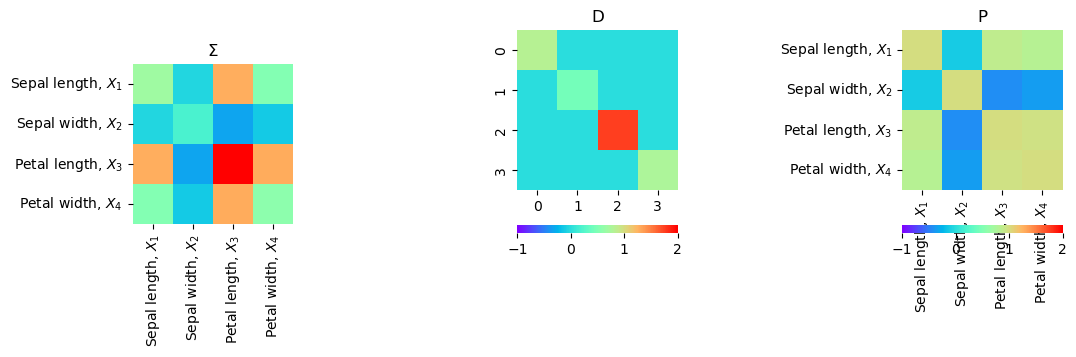

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])  # 设置当前子图
ax = sns.heatmap(SIGMA, cmap='rainbow', square = True, vmin=-1, vmax=2, cbar=False)  # 绘制协方差矩阵
plt.title(r'$\Sigma$')  # 设置标题

# 中间步骤（省略）
plt.sca(axs[2])  # 设置当前子图
ax = sns.heatmap(D, cmap='rainbow', vmin=-1, square = True, vmax=2, cbar_kws={"orientation": "horizontal"})  # 绘制D矩阵
plt.title('D')  # 设置标题

plt.sca(axs[4])  # 设置当前子图
ax = sns.heatmap(RHO, cmap='rainbow', vmin=-1, square = True, vmax=2, cbar_kws={"orientation": "horizontal"})  # 绘制相关矩阵P
plt.title('P')  # 设置标题

axs[1].axis('off')
axs[3].axis('off')

## 协方差矩阵的特征分解：$\Sigma = V \cdot \Lambda \cdot V^T$

In [16]:
LAMBDA_, V = np.linalg.eig(SIGMA)  # 计算特征值和特征向量

In [17]:
LAMBDA = np.diag(LAMBDA_)  # 构建特征值矩阵

(0.0, 1.0, 0.0, 1.0)

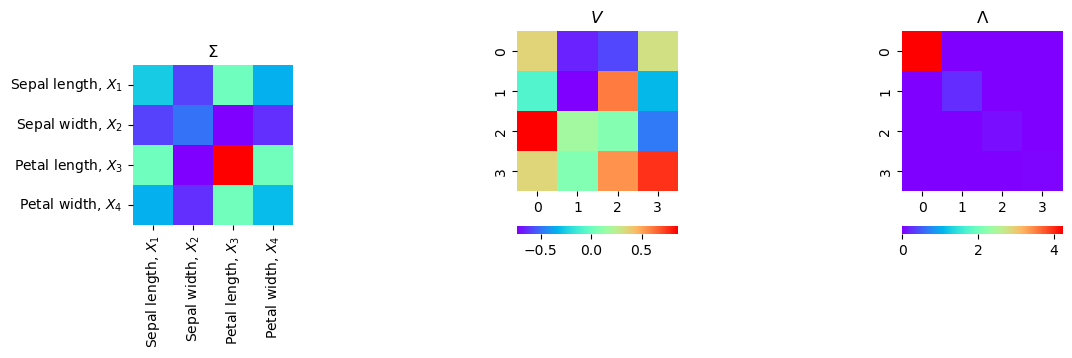

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])  # 设置当前子图
ax = sns.heatmap(SIGMA, cmap='rainbow', square = True, cbar=False)  # 绘制协方差矩阵
plt.title(r'$\Sigma$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图
ax = sns.heatmap(V, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制特征向量矩阵V
plt.title(r'$V$')  # 设置标题

plt.sca(axs[4])  # 设置当前子图
ax = sns.heatmap(LAMBDA, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制特征值矩阵$\Lambda$
plt.title(r'$\Lambda$')  # 设置标题

axs[1].axis('off')
axs[3].axis('off')

## 协方差矩阵的逆矩阵分解：$\Sigma^{-1} = V \cdot \Lambda^{-1} \cdot V^T$

(0.0, 1.0, 0.0, 1.0)

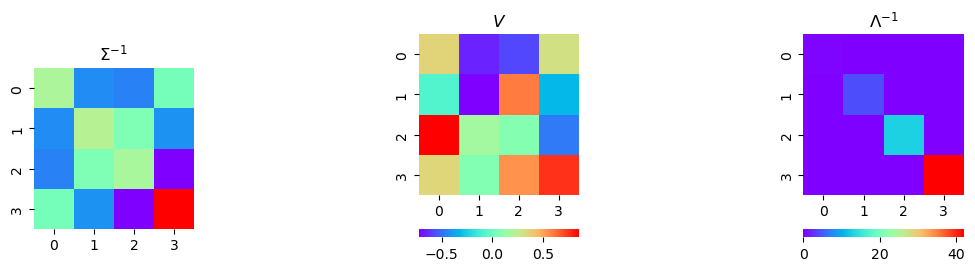

In [19]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])  # 设置当前子图
ax = sns.heatmap(SIGMA_inv, cmap='rainbow', square = True, cbar=False)  # 绘制协方差矩阵的逆矩阵
plt.title(r'$\Sigma^{-1}$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图
ax = sns.heatmap(V, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制特征向量矩阵V
plt.title(r'$V$')  # 设置标题

plt.sca(axs[4])  # 设置当前子图
ax = sns.heatmap(np.linalg.inv(LAMBDA), cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制特征值逆矩阵$\Lambda^{-1}$
plt.title(r'$\Lambda^{-1}$')  # 设置标题

axs[1].axis('off')
axs[3].axis('off')

## 奇异值分解

In [20]:
X_c_df = X_df - X_df.mean()  # 数据中心化

In [21]:
U, S_, V = np.linalg.svd(X_c_df, full_matrices=False)  # 计算奇异值分解

In [22]:
V = V.T  # 转置特征向量矩阵

In [23]:
S = np.diag(S_)  # 构建奇异值矩阵

(0.0, 1.0, 0.0, 1.0)

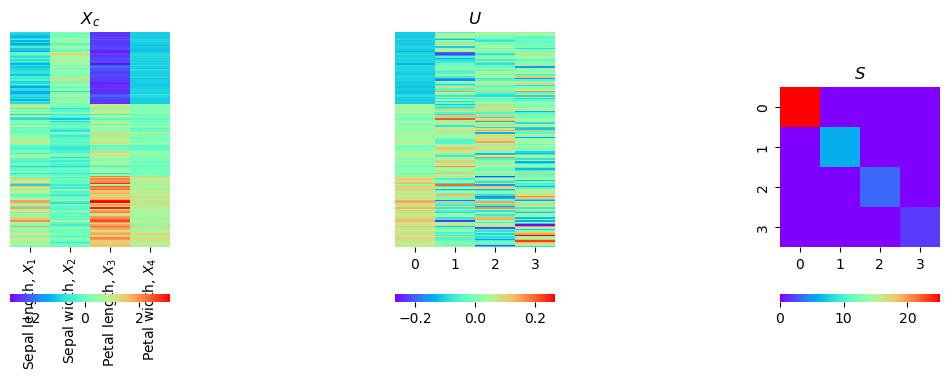

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))  # 创建子图

plt.sca(axs[0])  # 设置当前子图
ax = sns.heatmap(X_c_df, cmap='rainbow', yticklabels=False, cbar_kws={"orientation": "horizontal"})  # 绘制中心化数据
plt.title(r'$X_c$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图
ax = sns.heatmap(U, cmap='rainbow', yticklabels=False, cbar_kws={"orientation": "horizontal"})  # 绘制矩阵U
plt.title(r'$U$')  # 设置标题

plt.sca(axs[4])  # 设置当前子图
ax = sns.heatmap(S, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制奇异值矩阵S
plt.title(r'$S$')  # 设置标题

axs[1].axis('off')
axs[3].axis('off')

## Cholesky分解

In [25]:
L = scipy.linalg.cholesky(SIGMA, lower=True)  # 计算Cholesky分解的下三角矩阵

In [26]:
R = scipy.linalg.cholesky(SIGMA, lower=False)  # 计算Cholesky分解的上三角矩阵

(0.0, 1.0, 0.0, 1.0)

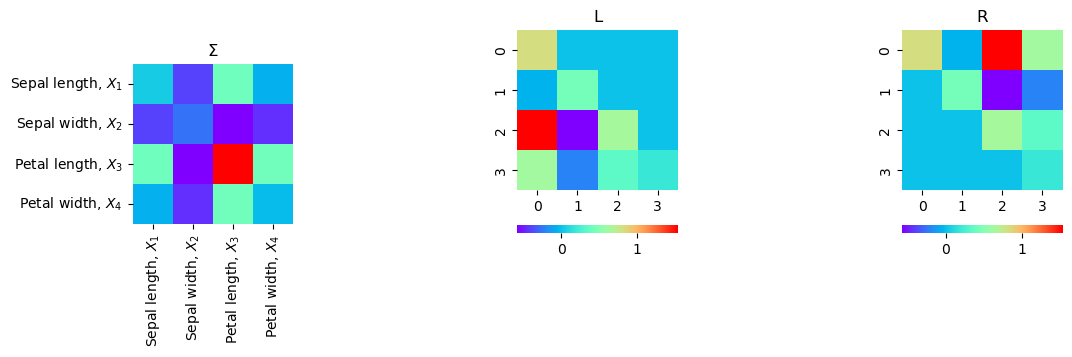

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])  # 设置当前子图
ax = sns.heatmap(SIGMA, cmap='rainbow', square = True, cbar=False)  # 绘制协方差矩阵
plt.title(r'$\Sigma$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图
ax = sns.heatmap(L, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制下三角矩阵L
plt.title('L')  # 设置标题

plt.sca(axs[4])  # 设置当前子图
ax = sns.heatmap(R, cmap='rainbow', square = True, cbar_kws={"orientation": "horizontal"})  # 绘制上三角矩阵R
plt.title('R')  # 设置标题

axs[1].axis('off')
axs[3].axis('off')